In [7]:
import os
os.chdir("/gpfs/home/edgpu/edgpu05/miniconda3/lab/cgcnn_test/")

Epochs: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
Train MAE: [1.183, 0.932, 0.837, 0.776, 0.764, 0.699, 0.674, 0.698, 0.639, 0.627, 0.638, 0.68, 0.61, 0.573, 0.567, 0.575, 0.583, 0.533, 0.529, 0.538, 0.512, 0.513, 0.519, 0.507, 0.514, 0.495, 0.507, 0.494, 0.529, 0.473]
Validation MAE: [1.296, 1.093, 1.021, 0.857, 0.752, 0.694, 0.859, 0.819, 0.69, 0.64, 0.689, 0.643, 0.727, 0.623, 0.594, 0.632, 0.613, 0.629, 0.597, 0.602, 0.795, 0.601, 0.628, 0.654, 0.624, 0.581, 0.619, 0.611, 0.616, 0.614]


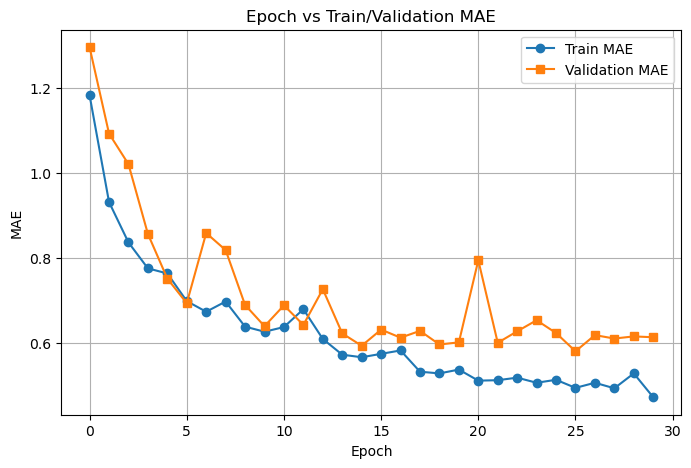

In [9]:
import re
import matplotlib.pyplot as plt

# 로그 파일 경로 
log_file = '731_log.txt'

# 로그 파일 읽기 (인코딩 문제 발생 시 'utf-8-sig' 등으로 조정)
with open(log_file, 'r', encoding='utf-8') as f:
    lines = f.readlines()

epochs = []
train_maes = []   # 에폭별 평균 train MAE (괄호 안 값)
val_maes = []     # 에폭별 validation MAE (* MAE 뒤의 값)

current_epoch = None
current_train_mae = None

# 정규식 패턴
# 1. 에폭 내의 마지막 Train MAE를 찾기 위한 패턴:
#    예: "Epoch: [0][11/12] ... MAE 0.7799 (1.2220)"
pattern_epoch = re.compile(r"Epoch:\s+\[(\d+)\]\[\d+/\d+\].*?MAE\s+[0-9.]+\s+\(([0-9.]+)\)")
# 2. 에폭 후의 Validation MAE를 찾기 위한 패턴 (앞에 별표가 있음):
#    예: " * MAE 1.100"
pattern_val = re.compile(r"\*\s+MAE\s+([0-9.]+)")

for line in lines:
    # 에폭 관련 줄에서 Train MAE (괄호 안 값) 추출
    m_epoch = pattern_epoch.search(line)
    if m_epoch:
        current_epoch = int(m_epoch.group(1))
        current_train_mae = float(m_epoch.group(2))
    
    # 에폭 끝에 이어서 나오는 Validation MAE 줄 추출
    m_val = pattern_val.search(line)
    if m_val and (current_epoch is not None):
        val_mae = float(m_val.group(1))
        # 해당 에폭에 대해 데이터를 저장합니다.
        epochs.append(current_epoch)
        train_maes.append(current_train_mae)
        val_maes.append(val_mae)
        # 다음 에폭을 위해 초기화
        current_epoch = None
        current_train_mae = None

# 데이터 확인
print("Epochs:", epochs)
print("Train MAE:", train_maes)
print("Validation MAE:", val_maes)

# 그래프 그리기
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_maes, marker='o', label='Train MAE')
plt.plot(epochs, val_maes, marker='s', label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Epoch vs Train/Validation MAE')
plt.legend()
plt.grid(True)
plt.show()
